In [1]:
import numpy as np

def cross_entropy_loss(X, y):

    exp_x = np.exp(X)
    probs = exp_x / np.sum(exp_x, axis=1, keepdims=True)
    log_probs = - np.log([probs[i, y[i]] for i in range(len(probs))])
    loss = np.mean(log_probs)

    return loss

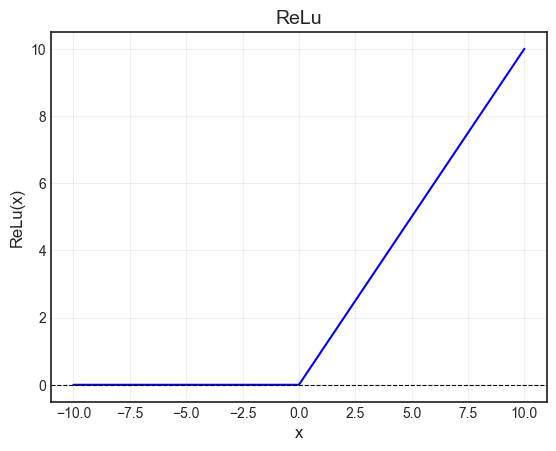

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)
relu = np.maximum(0, x)

with plt.style.context("seaborn-v0_8-white"):
    plt.figure()
    plt.plot(x, relu, label="ReLU(x)", color="blue")
    plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
    plt.title("ReLu", fontsize=14)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("ReLu(x)", fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

In [3]:
def square(x):
    return x**2

In [4]:
type(square)

function

In [5]:
square(12)

144

In [6]:
def cube(x):
    return x**3

In [8]:
x = 2

square(x) + cube(x)

12

In [9]:
square(2)*cube(2)

32

In [11]:
square(cube(x))

64

In [12]:
def compose(f, g):

    def composition(*args, **kwargs):
        return f(g(*args, **kwargs))
    
    return composition

In [13]:
square_cube_composition = compose(square, cube)

square_cube_composition(2)

64

In [14]:
def linear(x, a, b):
    return a*x + b

In [15]:
class Linear:

    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __call__(self, x):
        return self.a*x + self.b

In [17]:
f = Linear(2, -1)
f(2.1)

3.2

In [18]:
f.a, f.b

(2, -1)

In [19]:
class Linear:

    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __call__(self, x):
        return self.a*x + self.b
    
    def parameters(self):
        return {"a": self.a, "b": self.b}

In [21]:
f = Linear(2, -1)
f.parameters()

{'a': 2, 'b': -1}

In [22]:
f

In [23]:
class Linear:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __call__(self, x):
        return self.a*x + self.b
    
    def __repr__(self):
        return f"Linear(a={self.a}, b={self.b})"
    
    def parameters(self):
        return {"a": self.a, "b": self.b}

In [24]:
f = Linear(2, -1)

In [25]:
f

Linear(a=2, b=-1)

In [26]:
class Function:
    def __init__(self):
        pass
    
    def __call__(self, *args, **kwargs):
        pass
    
    def parameters(self):
        return dict()

In [27]:
import numpy as np

class Sigmoid(Function):
    
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

In [28]:
sigmoid = Sigmoid()

In [29]:
sigmoid(2)

np.float64(0.8807970779778823)

In [31]:
sigmoid.parameters()

{}

In [32]:
composed = compose(Linear(2, -1), Sigmoid())

In [33]:
composed(2)

np.float64(0.7615941559557646)

In [34]:
isinstance(composed, Function)

False

In [35]:
composed.parameters()

AttributeError: 'function' object has no attribute 'parameters'

In [36]:
class Composition(Function):
    def __init__(self, *functions):
        self.functions = functions
        
    def __call__(self, x):
        
        for f in reversed(self.functions):
            x = f(x)
            
        return x

In [37]:
composed = Composition(Linear(2, -1), Sigmoid())

In [38]:
composed(2)

np.float64(0.7615941559557646)

In [39]:
composed.parameters()

{}

In [40]:
isinstance(composed, Function)

True

In [41]:
def add(f, g):
    
    def sum(*args, **kwargs):
        return f(*args, **kwargs) + g(*args, **kwargs)
    
    return sum
